In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import numpy as np
from typing import Union
from sklearn.neural_network._base import ACTIVATIONS
from sklearn.neural_network import MLPClassifier
from mlxtend.classifier import Adaline

## Some utils functions

In [2]:
def generate_node() -> tuple((float, float)):
    """
    Return a tuple of two float value <x, y>
    when x, y <= +-100
    """
    x = random.randint(-10000, 10000)
    y = random.randint(-10000, 10000)
    return (x / 100, y / 100)

def step_function(data: Union[float, np.float64, np.ndarray]) -> int:
    """
    Step function
    """
    if type(data) is np.float64 or type(data) is float:
        return 1 if data > 1 else -1
    elif type(data) is np.ndarray:
        return 1 if data[1] > 1 else -1
    else:
        raise ValueError(
            f"Invalid input {data} type {type(data)}, should be float, np.float64 or np.ndarray")

def create_data(step, n: int = 1000, int_type: bool = True) -> tuple:
    """
    Create two arrays of data, the first one called data contains n tuples of two random float value <x, y>,
    the second called label contains n labels of the data values: 1 if data.y > 1 else -1
    """
    data = []
    label = []
    for _ in range(n):
        node = generate_node()
        data.append(node)
        if int_type:
            label.append(step(node[1]))
        else:
            label.append(step(node))
    return (np.array(data), np.array(label))

def accuracy(predicted, test_label) -> float:
    """
    Given a predicted label and the test label return the accuracy
    """
    count = 0
    for i, j in zip(predicted, test_label):
        if i == j:
            count += 1
    return count / len(predicted)
    
def MSE(predicted: list, test_label: list) -> float:
    """
    Calculate the MSE (Mean Square error)
    """
    return ((np.array(predicted) - np.array(test_label))**2).mean()

In [3]:
def get_confusion_matrix_data(predicted: list, test_label: list) -> np.array:
    """
    Return all the confusion matrix data in this format:
    [[true_negative false_positive]
     [false_negative true_positive]]
    """
    true_positive = false_positive = true_negative = false_negative = 0
    for i, j in zip(predicted, test_label):
        if i == 1 and j == 1:
            true_positive += 1
        elif i == -1 and j == 1:
            false_positive += 1
        elif i == -1 and j == -1:
            true_negative += 1
        elif i == 1 and j == -1:
            false_negative += 1
    cf_matrix = np.array([true_negative, false_positive, false_negative, true_positive])
    cf_matrix = np.reshape(cf_matrix, (2, 2))
    return cf_matrix

def print_confusion_matrix_data(cf_matrix, title: str = ""):
    """
    Plotting the given confusion matrix
    """
    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
    labels = np.asarray(group_counts).reshape(2,2)
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    ax.set_title(f'{title}\n\n', color='white');
    ax.set_xlabel('\nPredicted Values', color='white')
    ax.set_ylabel('Actual Values ', color='white');
    ax.xaxis.set_ticklabels(['False Negative','True Negative'], color='white')
    ax.yaxis.set_ticklabels(['False Positive','True Positive'], color='white')
    plt.show()
    
def get_precision(true_positive: int, false_positive: int) -> int:
    """
    Return precision
    """
    return true_positive / (true_positive + false_positive)

def get_recall(true_positive: int, false_negative: int) -> int:
    """
    Return recall
    """
    return true_positive / (true_positive + false_negative)

def get_f_score(true_positive: int, false_positive:int, false_negative: int) -> int:
    """
    Return f_score
    """
    counter = get_precision(true_positive, false_positive) * get_recall(true_positive, false_negative)
    denominator = get_precision(true_positive, false_positive) + get_recall(true_positive, false_negative)
    return counter / denominator

def print_scores(cf_matrix_1: np.array):
    """
    Print scores
    """
    true_positive = cf_matrix_1[1][1]
    false_positive = cf_matrix_1[0][1]
    false_negative = cf_matrix_1[1][0]
    print("Precision: {:.3f}".format(get_precision(true_positive, false_positive)))
    print("Recall: {:.3f}".format(get_recall(true_positive, false_negative)))
    print("F Score: {:.3f}".format(get_f_score(true_positive, false_positive, false_negative)))

In [4]:
def next_layer(clf, X, layers):
    clf_activate = ACTIVATIONS[clf.activation]
    
    # update each layer
    for layer in range(layers - 1):
        weights, bias = clf.coefs_[layer], clf.intercepts_[layer]
        # update X
        X = X.dot(weights) + bias
        
        # not the last layer
        if layer != layers - 2:
            clf_activate(X)
            
    # more than one neuron in last layer
    if X.shape[1] > 1:
        return [clf._label_binarizer.inverse_transform(X[:, layer]) for layer in range(X.shape[1])]
    
    # only one neuron in the last layer
    else:
        # use the activate for the last output neuron
        clf_activate(X)
        return clf._label_binarizer.inverse_transform(X)

def plot_layer(train_data, layer_output, layer_number: str = "", title: str = None):
    """
    Plot the outputs of each neuron in the given layer
    """
    neuron_number = 0
    for neuron in layer_output:
        
        # green dots
        plt.scatter(x=train_data[neuron == -1, 1], y=train_data[neuron == -1, 0], alpha=0.9,
                    c='green', marker='s', label=-1.0)

        # orange dots
        plt.scatter(x=train_data[neuron == 1, 1], y=train_data[neuron == 1, 0], alpha=0.9,
                    c='orange', label=1.0)
        
        # location of the legend
        plt.legend(loc='upper left')
        
        # set the title
        if title:
            plt.title(title)
        else:
            plt.title("Layer: " + str(layer_number) + " Neuron: " + str(neuron_number + 1))
        neuron_number += 1
        
        # plot
        plt.show()

## Part C:

### Network Layers Architecture:
1. Two input neurons
2. Three hidden layer neurons
3. One output neurons

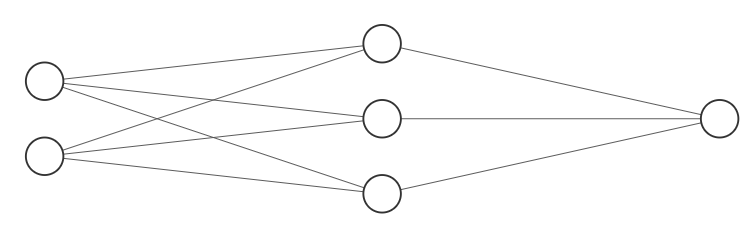

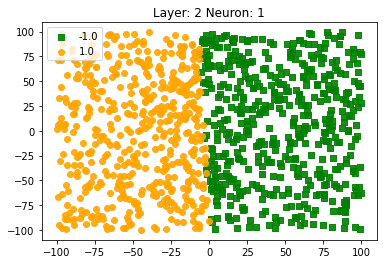

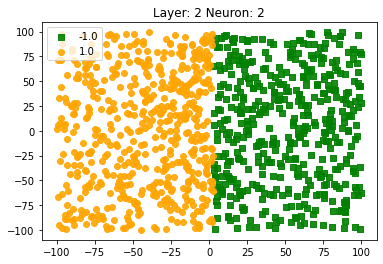

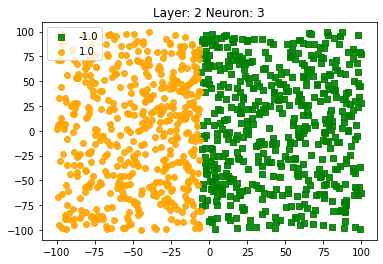

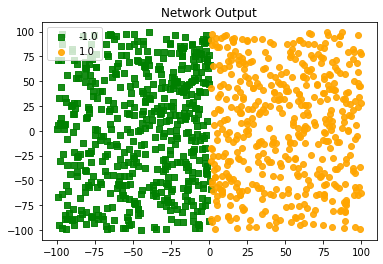

In [5]:
# create train data
train_data, train_label = create_data(step_function)

# crate mlp
classifier_mlp = MLPClassifier(
    activation='relu', learning_rate_init=0.1,
    hidden_layer_sizes=(3,), random_state=1, max_iter=200)

# train mlp with train set
classifier_mlp.fit(train_data, train_label)

# for each layer plot the output of each neuron
for layer in range(2, classifier_mlp.n_layers_):
    layer_output = next_layer(classifier_mlp, train_data, layer)
    plot_layer(train_data=train_data, layer_output=layer_output, layer_number=layer)

# plot the output neuron of the network
predicted = classifier_mlp.predict(train_data)
plot_layer(train_data=train_data, layer_output=np.array([predicted]), title="Network Output")

In [6]:
# create test set
test_data, test_label = create_data(step_function)

# get the predicted labels from the test data
predicted = classifier_mlp.predict(test_data)

# predict with test set and print accuracy with test set
print(f"Accuracy of output mlp is: {accuracy(predicted, test_label)}")

# print MSE
print(f"Mean Square Error of Adaine with mlp is: {MSE(predicted, test_label)}")

Accuracy of output mlp is: 0.999
Mean Square Error of Adaine with mlp is: 0.004


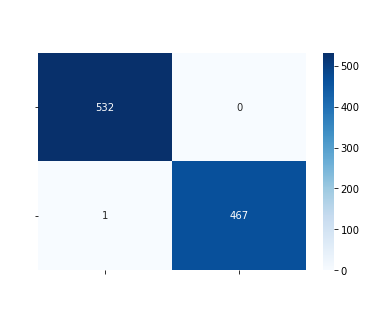

In [7]:
cf_matrix = get_confusion_matrix_data(predicted, test_label)
print_confusion_matrix_data(cf_matrix, title="mlp test set confusion matrix")

In [8]:
print_scores(cf_matrix)

Precision: 1.000
Recall: 0.998
F Score: 0.499


## Part D:

### Network Layers Architecture:
1. Two input neurons
2. Three hidden layer neurons
3. Two neurons as output of the mlp and input to adaline classifier
3. One output neurons from the adaline classifier

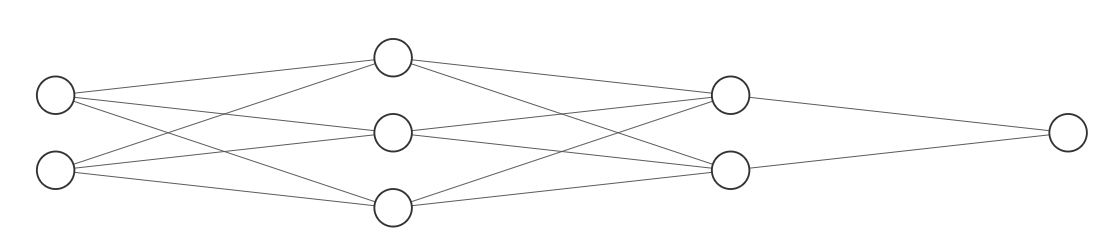

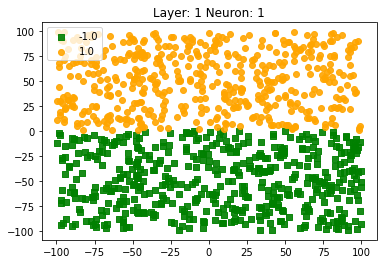

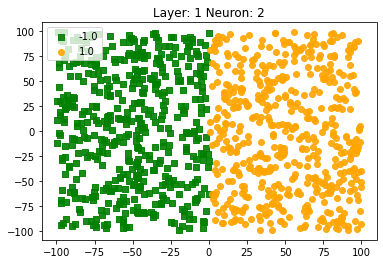

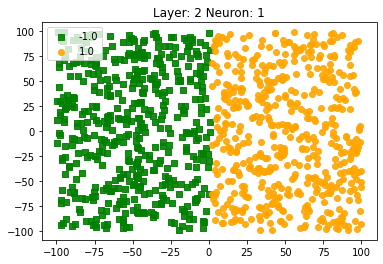

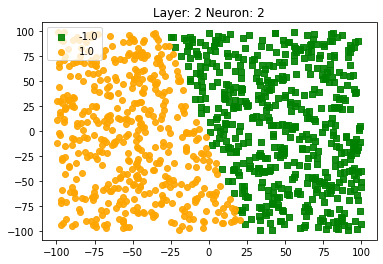

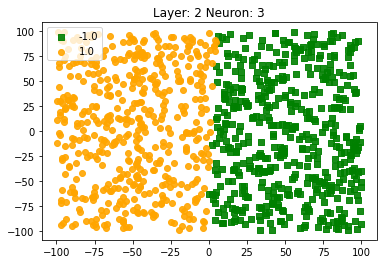

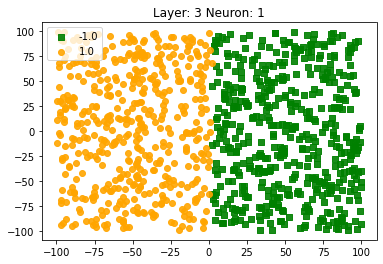

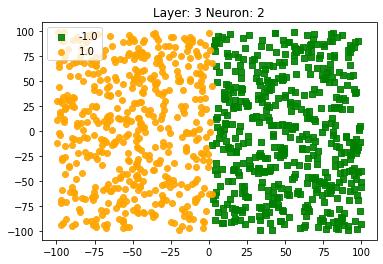

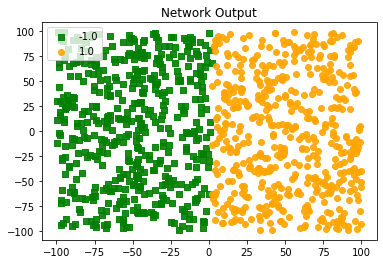

In [9]:
# create train data
train_data, train_label = create_data(step_function)

# crate mlp
classifier_mlp = MLPClassifier(
    activation='relu', learning_rate_init=0.1,
    hidden_layer_sizes=(3, 2), random_state=1, max_iter=200)

# train mlp with train set
classifier_mlp.fit(train_data, train_label)

# for each layer plot the output of each neuron
last_hidden_layer = []
for layer in range(1, classifier_mlp.n_layers_):
    layer_output = next_layer(classifier_mlp, train_data, layer)
    plot_layer(train_data=train_data, layer_output=layer_output, layer_number=layer)
    if layer == classifier_mlp.n_layers_ - 1:
        last_hidden_layer = layer_output
        
# create the input of the adaline as the output of the mlp
X_Adaline = np.array([last_hidden_layer[0], last_hidden_layer[1]]).T

# change train label for adaline
train_label = np.where(train_label < 0, 0, 1)

# create adaline classifier
classifier_adaline = Adaline(epochs=2, eta=0.01, random_seed=0)

# train adaline classifier
classifier_adaline.fit(X_Adaline, train_label.astype(int))

# fix adaline output
predicted = classifier_adaline.predict(X_Adaline)

# fix predicted labels
predicted = np.where(predicted < 1, -1, 1)

# fix train labels
train_label = np.where(train_label < 1, -1, 1)

# plot the output neuron of the network
plot_layer(train_data=train_data, layer_output=np.array([predicted]), title="Network Output")

In [10]:
# print accuracy with test set
print(f"Accuracy of output Adaine with mlp is: {accuracy(predicted, train_label)}")
print(f"Mean Square Error of Adaine with mlp is: {MSE(predicted, train_label)}")

Accuracy of output Adaine with mlp is: 0.999
Mean Square Error of Adaine with mlp is: 0.004


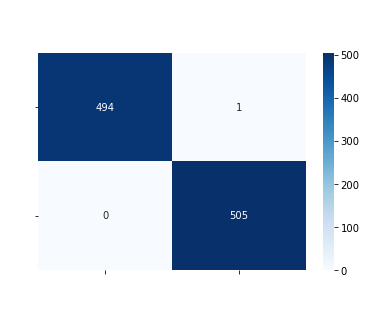

In [11]:
cf_matrix = get_confusion_matrix_data(predicted, train_label)
print_confusion_matrix_data(cf_matrix, title="mlp test set confusion matrix")

In [12]:
print_scores(cf_matrix)

Precision: 0.998
Recall: 1.000
F Score: 0.500
